In [26]:
import pandas as pd
tags_df=pd.read_csv(r"E:\Stack-Overflow\data\raw\Tags.csv")
tags_df.head()


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [2]:
import polars as pl
tag_df=pl.read_csv(r"E:\Stack-Overflow\data\raw\Tags.csv")
tag_df.head()


Id,Tag
i64,str
80,"""flex"""
80,"""actionscript-3"""
80,"""air"""
90,"""svn"""
90,"""tortoisesvn"""


In [8]:
questions_df=pd.read_csv(r"E:\Stack-Overflow\data\raw\Questions.csv",encoding="ISO-8859-1")
questions_df.head()


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [6]:
tags_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [9]:
questions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [12]:
print("length of questions ",len(questions_df))

print("length of tags ",len(tags_df))

length of questions  1264216
length of tags  3750994


In [17]:
temp_df = pd.DataFrame(tags_df['Tag'].value_counts())
temp_df.reset_index(inplace=True)
top10 = temp_df.head(10)
top10

,Tag,count
0,javascript,118826
1,java,114208
2,c#,100192
3,php,92015
4,android,71963
5,python,62622
6,c++,45318
7,ios,36618
8,jquery,31429
9,ruby-on-rails,22556


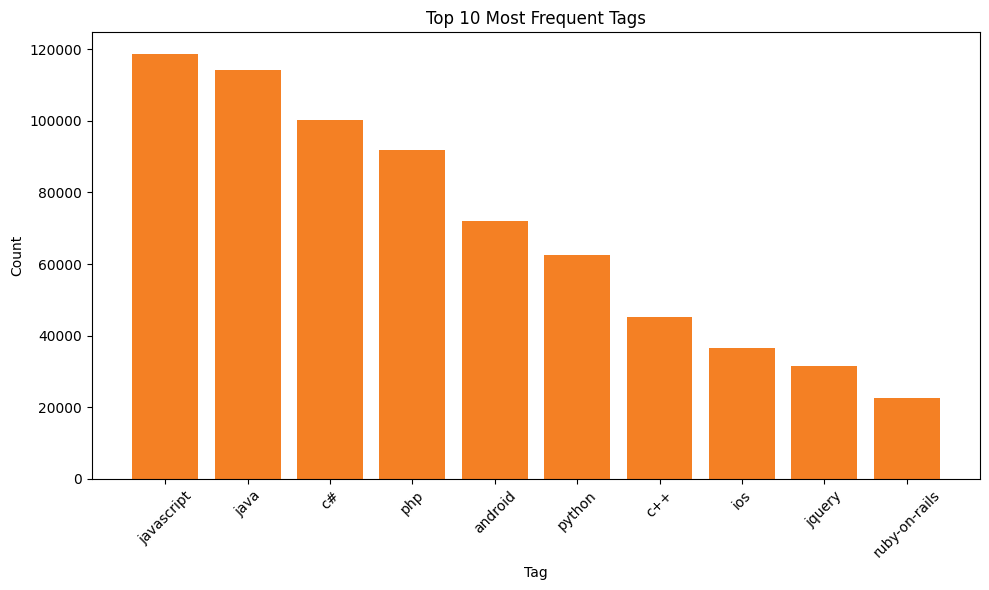

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top10['Tag'], top10['count'], color='#f48024')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
questions_df.columns


Index(['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title',
       'Body'],
      dtype='object')

In [23]:
questions_df.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)
questions_df.head()




,Id,Score,Title,Body
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [28]:
tags_df['Tag'] = tags_df['Tag'].astype(str)
grouped_tags = tags_df.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.head(5)

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [29]:
grouped_tags.reset_index()

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [30]:
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
grouped_tags_final.head()

,Id,Tags
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction


In [32]:
df = questions_df.merge(grouped_tags_final, on='Id')
df.head(5)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [33]:
new_df = df[df['Score']>5]
new_df.info

<bound method DataFrame.info of                Id  Score                                              Title  \
0              80     26  SQLStatement.execute() - multiple queries in o...   
1              90    144  Good branching and merging tutorials for Torto...   
2             120     21                                  ASP.NET Site Maps   
3             180     53                 Function for creating color wheels   
4             260     49  Adding scripting functionality to .NET applica...   
...           ...    ...                                                ...   
1262915  40111730      7           How to use a dict to subset a DataFrame?   
1263065  40115300      7  Is there a way to use itertools in python to c...   
1263399  40123880      8  How can I force file ordering in F# projects u...   
1263454  40125310      6  Why does my result data returned as void* gets...   
1264205  40143070      6       What exactly makes a type system consistent?   

                   

In [34]:
new_df.isna().sum()

Id       0
Score    0
Title    0
Body     0
Tags     0
dtype: int64

In [35]:
new_df.duplicated().sum()


np.int64(0)

In [36]:
new_df.drop(columns=['Id', 'Score'], inplace=True)

C:\Users\ytrso\AppData\Local\Temp\ipykernel_11868\2626364964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['Id', 'Score'], inplace=True)


In [37]:
new_df.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [38]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())

C:\Users\ytrso\AppData\Local\Temp\ipykernel_11868\2485435344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())


In [39]:
all_tags = [item for sublist in new_df['Tags'].values for item in sublist]
len(all_tags)

224129

In [40]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

14883

In [41]:
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans

In [43]:
flat_list = [item for sublist in new_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]
tags_features


['c#',
 'java',
 'javascript',
 'android',
 'python',
 'c++',
 'php',
 'jquery',
 '.net',
 'ios',
 'html',
 'css',
 'c',
 'iphone',
 'objective-c',
 'ruby-on-rails',
 'sql',
 'asp.net',
 'mysql',
 'ruby',
 'r',
 'git',
 'asp.net-mvc',
 'linux',
 'sql-server',
 'node.js',
 'angularjs',
 'django',
 'performance',
 'algorithm',
 'string',
 'xcode',
 'arrays',
 'wpf',
 'eclipse',
 'haskell',
 'windows',
 'scala',
 'multithreading',
 'json',
 'c++11',
 'regex',
 'visual-studio',
 'html5',
 'osx',
 'swift',
 'database',
 'unit-testing',
 'spring',
 'xml',
 'bash',
 'ajax',
 'delphi',
 'cocoa-touch',
 'ruby-on-rails-3',
 'visual-studio-2010',
 'linq',
 'debugging',
 'generics',
 'perl',
 'entity-framework',
 'mongodb',
 'winforms',
 'cocoa',
 'security',
 'postgresql',
 'css3',
 'templates',
 'twitter-bootstrap',
 'shell',
 'list',
 'google-chrome',
 'vim',
 'oop',
 'image',
 'hibernate',
 'gcc',
 'asp.net-mvc-3',
 'facebook',
 'oracle',
 'rest',
 'maven',
 'http',
 'exception',
 'tsql',
 'ma

In [44]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [45]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)
new_df.shape


C:\Users\ytrso\AppData\Local\Temp\ipykernel_11868\3571877898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
C:\Users\ytrso\AppData\Local\Temp\ipykernel_11868\3571877898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)


(72950, 3)

In [46]:
new_df.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,None
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"


In [48]:
import warnings
warnings.filterwarnings('ignore')


In [49]:
new_df.dropna(subset=['Tags'], inplace=True)
print(new_df.shape)
new_df.head()

(63167, 3)


,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[c++, oop, class]"


In [51]:
import re
from bs4 import BeautifulSoup
new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 
new_df.head()

,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,[svn]
2,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...,"[sql, asp.net]"
3,Function for creating color wheels,This is something I've pseudo-solved many time...,[algorithm]
4,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,"[c#, .net]"
5,Should I use nested classes in this case?,I am working on a collection of classes used f...,"[c++, oop, class]"


In [52]:
token=ToktokTokenizer()
def remove_punctuation(text):
    words=token.tokenize(text)
    filtered=[]
    for w in words:
        if w not in tags_features:
            new_w=w.translate(str.maketrans('', '', string.punctuation))
            filtered.append(new_w)
        else:
            filtered.append(w)         
    s = " "
    s=s.join(filtered)
    return s

In [53]:
#to check if the function (remove punctuation) is working as we expeted
import string
text="text and word c# b. / "
words=token.tokenize(text)
filtered=[]
for w in words:
    if w not in tags_features:
        new_w=w.translate(str.maketrans('', '', string.punctuation))
        filtered.append(new_w)
    else:
        filtered.append(w)
print(filtered)            
s = " "
s=s.join(filtered)
s

['text', 'and', 'word', 'c#', 'b', '']


'text and word c# b '

In [54]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text


In [55]:
new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x)) 

In [56]:
new_df['Body']= new_df['Body'].apply(lambda x: re.sub('<[^<]+?>','',x))
new_df.head()


,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,are there any really good tutorials explaining...,[svn]
2,ASP.NET Site Maps,has anyone got experience creating sql-based a...,"[sql, asp.net]"
3,Function for creating color wheels,this is something i have pseudo-solved many ti...,[algorithm]
4,Adding scripting functionality to .NET applica...,i have a little game written in c#. it uses a ...,"[c#, .net]"
5,Should I use nested classes in this case?,i am working on a collection of classes used f...,"[c++, oop, class]"


In [57]:
new_df['Body'] = new_df['Body'].apply(lambda x: remove_punctuation(x))

In [58]:
new_df['Body'][2]

'has anyone got experience creating sqlbased asp.net sitemap providers  i have got the default xml file websitemap working properly with my menu and sitemappath controls  but i will need a way for the users of my site to create and modify pages dynamically i need to tie page viewing permissions into the standard asp.net membership system as well '

In [59]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ytrso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ytrso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ytrso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\ytrso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ytrso\AppData\Roaming\nltk_data...
[

True

In [60]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [61]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [62]:
new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x)) 

In [63]:
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: remove_punctuation(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x)) 

In [64]:
new_df.head()

,Title,Body,Tags
1,good branch merge tutorials tortoisesvn,really good tutorials explain branch merge apa...,[svn]
2,asp.net site map,anyone get experience create sqlbased asp.net ...,"[sql, asp.net]"
3,function create color wheel,something pseudosolved many time never quite f...,[algorithm]
4,add script functionality .net applications,little game write c use database backend trade...,"[c#, .net]"
5,use nest class case,work collection class use video playback recor...,"[c++, oop, class]"


In [87]:
new_df.to_csv(r"E:\Stack-Overflow\data\Processed\processed_data.csv", index=False)

In [65]:
new_df['Title']= new_df['Title'].astype(str)
vectorizer = TfidfVectorizer()
X1 = vectorizer.fit_transform(new_df['Title'].str.lower())

In [66]:
new_df['Body']= new_df['Body'].astype(str)
vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(new_df['Body'].str.lower())

In [67]:
y = new_df['Tags']
multilabel_binarizer = MultiLabelBinarizer()
new_y = multilabel_binarizer.fit_transform(y)

In [68]:
new_y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(63167, 100))

In [70]:
from scipy.sparse import hstack
X=hstack([X1,X2])

In [79]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3473865 stored elements and shape (63167, 379310)>

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.2, random_state = 42)

In [82]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(50533, 100))

In [83]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50533, 379310) (12634, 379310) (50533, 100) (12634, 100)


In [85]:
def print_score(y_pred, clf):
    print("Classifier: ", clf.__class__.__name__)
    jacard = np.minimum(y_test,y_pred).sum(axis=1) / np.maximum(y_test,y_pred).sum(axis=1)
    score=jacard.mean()*100
    print("Jacard score: {}".format(score))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    F1_Score=metrics.classification_report(y_test, y_pred).split()[-2]
    print('F1 Score of ',clf.__class__.__name__,":", F1_Score)
    print("-----------------------------------------------------------") 
    return F1_Score

In [86]:
import numpy as np
from sklearn import metrics
from tqdm import tqdm
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
Scores={}
for classifier in [sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=print_score(y_pred, classifier)
    Scores[classifier]=score

Classifier:  SGDClassifier
Jacard score: 45.63980792570313
Hamming loss: 0.9915307899319298
F1 Score of  SGDClassifier : 0.50
-----------------------------------------------------------
Classifier:  LogisticRegression
Jacard score: 44.33433591894887
Hamming loss: 1.0238246002849454
F1 Score of  LogisticRegression : 0.49
-----------------------------------------------------------
Classifier:  MultinomialNB
Jacard score: 0.5553796633423038
Hamming loss: 1.5828716162735474
F1 Score of  MultinomialNB : 0.01
-----------------------------------------------------------
Classifier:  LinearSVC
Jacard score: 54.15347475067279
Hamming loss: 0.9275763811936045
F1 Score of  LinearSVC : 0.60
-----------------------------------------------------------
Classifier:  Perceptron
Jacard score: 52.49854888924067
Hamming loss: 1.0732942852619916
F1 Score of  Perceptron : 0.59
-----------------------------------------------------------
Classifier:  PassiveAggressiveClassifier
Jacard score: 53.90401561922854


In [77]:
Scores

{SGDClassifier(): '0.50',
 LogisticRegression(): '0.47',
 MultinomialNB(): '0.00',
 LinearSVC(): '0.59',
 Perceptron(): '0.59',
 PassiveAggressiveClassifier(): '0.60'}

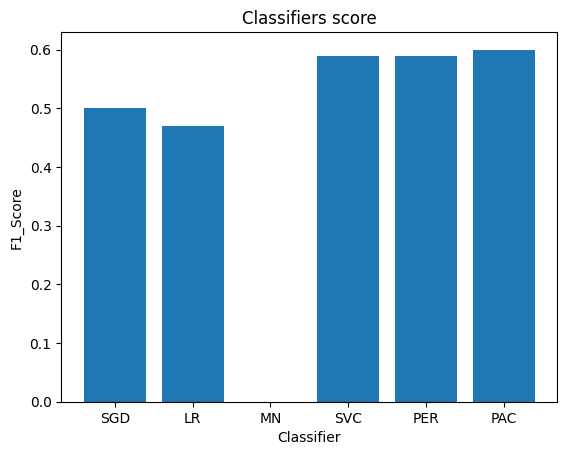

In [78]:
import matplotlib.pyplot as plt

# Create lists of keys and values

keys=['SGD','LR','MN','SVC','PER','PAC']
values = list(Scores.values())
values=[float(i) for i in values]

# Create a bar graph
plt.bar(keys, values)

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('F1_Score')
plt.title('Classifiers score')

# Show the plot
plt.show()